In [1]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from konlpy.tag import Okt
okt = Okt()

In [2]:
openFileName = '전자담배 효과_naver_blog_953.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
data = f.read()
f.close()

In [3]:
data=data.replace('\n','')
for i in range(1,953):
    x="naver_blog_"+str(i)
    data=data.replace(x,"\n\n"+x+"  "+"\n")
f = open('전자담배 효과_naver_blog_953.txt', 'w', encoding='utf-8')
f.write(data)
print(data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
openFileName = '전자담배 효과_naver_blog_953.txt'
    
f = open(openFileName, 'r', encoding='utf-8')
result = f.read()
f.close()

In [5]:
def tokenizer(raw, pos=["Noun"], stopword=[]): # 다른 품사 추가 원할 시 pos=["Noun", "Josa", ...]
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅋ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

data = tokenizer(result)

In [16]:
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [17]:
print(X)

  (0, 10574)	1
  (1, 14360)	1
  (2, 4281)	1
  (3, 5912)	1
  (4, 8595)	1
  (5, 10574)	1
  (6, 7358)	1
  (7, 8156)	1
  (8, 8736)	1
  (9, 13247)	1
  (10, 9709)	1
  (11, 1970)	1
  (12, 10236)	1
  (13, 14156)	1
  (14, 5673)	1
  (15, 4826)	1
  (16, 8595)	1
  (17, 5969)	1
  (18, 11087)	1
  (19, 11579)	1
  (20, 8595)	1
  (21, 468)	1
  (22, 5235)	1
  (23, 92)	1
  (24, 3205)	1
  :	:
  (236556, 7342)	1
  (236557, 10362)	1
  (236558, 6459)	1
  (236559, 11265)	1
  (236560, 10574)	1
  (236561, 6453)	1
  (236562, 1593)	1
  (236563, 2639)	1
  (236564, 6453)	1
  (236565, 4353)	1
  (236566, 3242)	1
  (236567, 1511)	1
  (236568, 6453)	1
  (236569, 4306)	1
  (236570, 9550)	1
  (236571, 3638)	1
  (236572, 2804)	1
  (236573, 10531)	1
  (236574, 6141)	1
  (236575, 2636)	1
  (236576, 10727)	1
  (236577, 7872)	1
  (236578, 14182)	1
  (236579, 14270)	1
  (236580, 9677)	1


In [18]:
print(vectorize.vocabulary_)

{'전자담배': 10574, '효과': 14360, '무엇': 4281, '사람': 5912, '연초': 8595, '시작': 7358, '얘기': 8156, '오늘': 8736, '포스팅': 13247, '이야기': 9709, '내용': 1970, '작성': 10236, '혹시': 14156, '블로그': 5673, '방문': 4826, '사용': 5969, '주위': 11087, '차라리': 11579, '건강': 468, '보신': 5235, '가요': 92, '또한': 3205, '이제': 9754, '듣기': 3065, '생각': 6268, '대한': 2636, '이유': 9733, '지금': 11265, '우선': 9081, '가장': 106, '기본': 1542, '목적': 4177, '대용': 2582, '해도': 13839, '과언': 970, '사실': 5956, '아시': 7763, '니코틴': 2246, '패치': 13069, '대체': 2610, '수단': 6857, '금연': 1466, '제일': 10847, '전담': 10513, '흡입': 14480, '방식': 4841, '외형': 8955, '심리': 7585, '안정감': 7920, '무화량': 4328, '중독': 11170, '물질': 4397, '때문': 3183, '머리': 3925, '계속': 689, '경우': 649, '여기': 8426, '정말': 10719, '가지': 122, '화학물질': 14253, '발생': 4771, '발암': 4774, '인체': 9903, '여가': 8419, '지나': 11270, '반면': 4688, '과연': 971, '전체': 10596, '비교': 5685, '부재': 5450, '다시': 2306, '불상': 5578, '사가': 5879, '정도': 10709, '결과': 581, '나머지': 1802, '무시': 4275, '영향': 8684, '성분': 6517, '더욱': 2668, '부분': 5405, '이지': 

In [19]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in vectorize.vocabulary_.items()]
dict(freqs)

{'전자담배': 12249,
 '효과': 1879,
 '무엇': 189,
 '사람': 1012,
 '연초': 1030,
 '시작': 517,
 '얘기': 59,
 '오늘': 603,
 '포스팅': 310,
 '이야기': 244,
 '내용': 226,
 '작성': 54,
 '혹시': 124,
 '블로그': 106,
 '방문': 266,
 '사용': 3505,
 '주위': 106,
 '차라리': 31,
 '건강': 610,
 '보신': 43,
 '가요': 49,
 '또한': 506,
 '이제': 401,
 '듣기': 2,
 '생각': 1445,
 '대한': 560,
 '이유': 377,
 '지금': 457,
 '우선': 141,
 '가장': 699,
 '기본': 210,
 '목적': 96,
 '대용': 16,
 '해도': 140,
 '과언': 9,
 '사실': 465,
 '아시': 49,
 '니코틴': 2271,
 '패치': 191,
 '대체': 140,
 '수단': 63,
 '금연': 3929,
 '제일': 149,
 '전담': 231,
 '흡입': 630,
 '방식': 440,
 '외형': 14,
 '심리': 17,
 '안정감': 7,
 '무화량': 237,
 '중독': 282,
 '물질': 712,
 '때문': 1537,
 '머리': 75,
 '계속': 267,
 '경우': 945,
 '여기': 259,
 '정말': 846,
 '가지': 939,
 '화학물질': 64,
 '발생': 279,
 '발암': 261,
 '인체': 137,
 '여가': 9,
 '지나': 17,
 '반면': 64,
 '과연': 79,
 '전체': 122,
 '비교': 337,
 '부재': 7,
 '다시': 380,
 '불상': 3,
 '사가': 10,
 '정도': 898,
 '결과': 535,
 '나머지': 30,
 '무시': 33,
 '영향': 205,
 '성분': 342,
 '더욱': 234,
 '부분': 807,
 '이지': 40,
 '어째서': 1,
 '정지': 4,
 '면서'

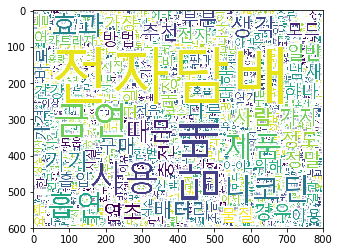

In [22]:
from wordcloud import WordCloud

w=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)
#plt.axis(&quot;off&quot;)
plt.show()

In [23]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) # 단어집의 콘텐츠를 나타낸다. value값은 인덱스를 나타낸다.
print(Y.toarray()) # 단어집에 있는 단어들의 각각의 카운트 갯수를 나타낸다.

{'전자담배': 10574, '효과': 14360, '무엇': 4281, '사람': 5912, '연초': 8595, '시작': 7358, '얘기': 8156, '오늘': 8736, '포스팅': 13247, '이야기': 9709, '내용': 1970, '작성': 10236, '혹시': 14156, '블로그': 5673, '방문': 4826, '사용': 5969, '주위': 11087, '차라리': 11579, '건강': 468, '보신': 5235, '가요': 92, '또한': 3205, '이제': 9754, '듣기': 3065, '생각': 6268, '대한': 2636, '이유': 9733, '지금': 11265, '우선': 9081, '가장': 106, '기본': 1542, '목적': 4177, '대용': 2582, '해도': 13839, '과언': 970, '사실': 5956, '아시': 7763, '니코틴': 2246, '패치': 13069, '대체': 2610, '수단': 6857, '금연': 1466, '제일': 10847, '전담': 10513, '흡입': 14480, '방식': 4841, '외형': 8955, '심리': 7585, '안정감': 7920, '무화량': 4328, '중독': 11170, '물질': 4397, '때문': 3183, '머리': 3925, '계속': 689, '경우': 649, '여기': 8426, '정말': 10719, '가지': 122, '화학물질': 14253, '발생': 4771, '발암': 4774, '인체': 9903, '여가': 8419, '지나': 11270, '반면': 4688, '과연': 971, '전체': 10596, '비교': 5685, '부재': 5450, '다시': 2306, '불상': 5578, '사가': 5879, '정도': 10709, '결과': 581, '나머지': 1802, '무시': 4275, '영향': 8684, '성분': 6517, '더욱': 2668, '부분': 5405, '이지': 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
import operator

freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, idx in vectorizeT.vocabulary_.items()]
dict_result = dict(freqs_TFIDF)

# value(단어별 빈도수)를 기준으로 내림차순 정렬
# sort_result : 튜플을 항목으로 갖는 리스트

stop_word = ['금연', '선택', '요즘', '현재', '대한', '제품', '먼저', '물질', '유해', '언제', '느낌', '제일', '부분', '연초', '담배', 
             '달리', '방법', '한번', '사용', '사실', '거의', '위해', '배터리', '만큼', '발표', '정도', '청소', '직접', '가장', '이번', 
             '전자담배', '결과', '증상', '모두', '카트리지', '자체', '정말', '포함', '서면', '코일', '저희', '마음', '역시', '사진', 
             '항상', '통해', '모든', '시작', '일반', '여기', '무엇', '중독', '이용', '하나', '동안', '모드', '방식', '차이', '여러분', 
             '사람', '다른', '내용', '니코틴', '조금', '처음', '확인', '우리', '탱크', '등등', '이유', '하루', '아주', '약간', '효과', 
             '매우', '점점', '계속', '진짜', '최근', '가지', '설명', '경우', '실제', '해도', '거나', '오늘', '거기', '다시', '기능', 
             '완전', '때문', '또한', '오히려', '일단', '부산', '생각', '하카', '여러', '바로', '블랙', '전혀', '그냥', '하니', '친구', 
             '지금', '뭔가', '시간', '보고', '이제', '궐련', '대해', '기존', '대신', '더욱', '소개', '흡연', '보통', '상이']

for s in stop_word:
    dict_result.pop(s)

sort_result = sorted(dict_result.items(), reverse=True, key=operator.itemgetter(1))

for d in sort_result :
    print(d)

('기기', 1399.0)
('추천', 899.0)
('구매', 851.0)
('충전', 744.0)
('냄새', 731.0)
('매장', 684.0)
('전자', 645.0)
('가격', 645.0)
('흡입', 630.0)
('건강', 610.0)
('연기', 556.0)
('판매', 545.0)
('아이', 521.0)
('디자인', 517.0)
('구입', 465.0)
('보조', 454.0)
('도움', 442.0)
('코스', 441.0)
('에바', 434.0)
('종류', 433.0)
('호흡', 396.0)
('연구', 386.0)
('시연', 377.0)
('장점', 362.0)
('이상', 359.0)
('용량', 344.0)
('버튼', 343.0)
('성분', 342.0)
('화기', 339.0)
('비교', 337.0)
('쥬스', 330.0)
('교체', 329.0)
('베이핑', 326.0)
('문제', 318.0)
('포스팅', 310.0)
('카토', 306.0)
('미국', 300.0)
('출시', 295.0)
('회사', 293.0)
('개인', 291.0)
('영국', 284.0)
('몬스터', 282.0)
('마이', 280.0)
('발생', 279.0)
('상태', 267.0)
('방문', 266.0)
('라미', 265.0)
('국내', 262.0)
('인기', 262.0)
('발암', 261.0)
('멘솔', 260.0)
('이프', 259.0)
('이기', 257.0)
('색상', 254.0)
('브랜드', 252.0)
('녀석', 252.0)
('자신', 247.0)
('이야기', 244.0)
('타르', 243.0)
('판매점', 242.0)
('다음', 240.0)
('걱정', 239.0)
('무화량', 237.0)
('관련', 237.0)
('표현', 235.0)
('보시', 233.0)
('과일', 233.0)
('전담', 231.0)
('한국', 224.0)
('휴대', 220.0)
('상의', 220.

('차라리', 31.0)
('성도', 31.0)
('는걸', 31.0)
('대하', 31.0)
('용이', 31.0)
('직구', 31.0)
('가기', 31.0)
('불법', 31.0)
('소모', 31.0)
('통과', 31.0)
('전력', 31.0)
('사건', 31.0)
('화이팅', 31.0)
('대안', 31.0)
('증진', 31.0)
('실행', 31.0)
('워터', 31.0)
('강조', 31.0)
('방안', 31.0)
('공감', 31.0)
('중앙', 31.0)
('커버', 31.0)
('이드', 31.0)
('문헌', 31.0)
('힉스', 31.0)
('주요', 31.0)
('나머지', 30.0)
('간접', 30.0)
('라며', 30.0)
('차량', 30.0)
('미각', 30.0)
('만족도', 30.0)
('문제점', 30.0)
('가까이', 30.0)
('카카오', 30.0)
('파인애플', 30.0)
('문화', 30.0)
('유의', 30.0)
('내용물', 30.0)
('베터리', 30.0)
('메인', 30.0)
('고통', 30.0)
('공개', 30.0)
('이내', 30.0)
('가슴', 30.0)
('바닥', 30.0)
('하이브리드', 30.0)
('의도', 30.0)
('진동', 30.0)
('요새', 30.0)
('초음파', 30.0)
('발작', 30.0)
('미성년', 30.0)
('부과', 30.0)
('가죽', 30.0)
('멈리', 30.0)
('프레', 30.0)
('전망', 30.0)
('어둠', 30.0)
('가입', 29.0)
('런던', 29.0)
('권고', 29.0)
('기자', 29.0)
('보고서', 29.0)
('외국', 29.0)
('건가', 29.0)
('단골', 29.0)
('수명', 29.0)
('단맛', 29.0)
('글로벌', 29.0)
('제어', 29.0)
('이자', 29.0)
('대고', 29.0)
('조건', 29.0)
('누가', 29.0)
('조정', 

('냉장고', 16.0)
('고개', 16.0)
('염증', 16.0)
('크림', 16.0)
('다모아', 16.0)
('라이트', 16.0)
('어깨', 16.0)
('공공장소', 16.0)
('수백', 16.0)
('잔소리', 16.0)
('김해', 16.0)
('경남', 16.0)
('퇴근', 16.0)
('접점', 16.0)
('구청', 16.0)
('몸속', 16.0)
('녹차', 16.0)
('클래식', 16.0)
('대처', 16.0)
('린다', 16.0)
('첨가제', 16.0)
('용제', 16.0)
('숙취', 16.0)
('신사', 16.0)
('단체', 16.0)
('복지부', 16.0)
('붙이', 16.0)
('입력', 16.0)
('다닥', 16.0)
('태양', 16.0)
('스트로베리', 16.0)
('판교', 16.0)
('마비', 16.0)
('무어', 16.0)
('열선', 16.0)
('저주', 16.0)
('목포', 16.0)
('개기일식', 16.0)
('크랜베리', 16.0)
('보옥', 16.0)
('호소', 15.0)
('축적', 15.0)
('먼지', 15.0)
('소변', 15.0)
('잡지', 15.0)
('연산동', 15.0)
('저자', 15.0)
('가정의학', 15.0)
('경성대', 15.0)
('맞은편', 15.0)
('한계', 15.0)
('잠재', 15.0)
('대도', 15.0)
('하향', 15.0)
('팩토리', 15.0)
('초래', 15.0)
('성북구', 15.0)
('가로', 15.0)
('마개', 15.0)
('내내', 15.0)
('구형', 15.0)
('박람회', 15.0)
('레시', 15.0)
('회수', 15.0)
('고온', 15.0)
('수납', 15.0)
('대지', 15.0)
('신청', 15.0)
('에스', 15.0)
('조직', 15.0)
('동봉', 15.0)
('차세대', 15.0)
('이력', 15.0)
('식욕', 15.0)
('깊이', 15.0)


('문득', 7.0)
('보수', 7.0)
('이마트', 7.0)
('하여튼', 7.0)
('디자이어', 7.0)
('에디', 7.0)
('장식', 7.0)
('차선', 7.0)
('최악', 7.0)
('좌지우지', 7.0)
('운용', 7.0)
('명기', 7.0)
('스프레이', 7.0)
('로움', 7.0)
('주사위', 7.0)
('카본', 7.0)
('디테', 7.0)
('턴테이블', 7.0)
('비닐', 7.0)
('증서', 7.0)
('노랑', 7.0)
('덧글', 7.0)
('서현', 7.0)
('코코', 7.0)
('주황색', 7.0)
('커런트', 7.0)
('방금', 7.0)
('식스', 7.0)
('상나라', 7.0)
('패쓰', 7.0)
('배지', 7.0)
('직전', 7.0)
('의거', 7.0)
('품격', 7.0)
('극히', 7.0)
('블로거', 7.0)
('물의', 7.0)
('만점', 7.0)
('보습제', 7.0)
('데캉', 7.0)
('신라', 7.0)
('베이비', 7.0)
('구월', 7.0)
('낚시', 7.0)
('서두', 7.0)
('우레', 7.0)
('물담배', 7.0)
('테슬라', 7.0)
('대학원', 7.0)
('뇌졸중', 7.0)
('마디', 7.0)
('혈류', 7.0)
('재래식', 7.0)
('전지', 7.0)
('역학', 7.0)
('범주', 7.0)
('이산화탄소', 7.0)
('수위', 7.0)
('시트', 7.0)
('신호', 7.0)
('답십리', 7.0)
('서초동', 7.0)
('두피', 7.0)
('보람', 7.0)
('상일동', 7.0)
('고덕동', 7.0)
('대환영', 7.0)
('방독면', 7.0)
('달래', 7.0)
('방영', 7.0)
('장비', 7.0)
('부모', 7.0)
('덩달아', 7.0)
('지난주', 7.0)
('광화문', 7.0)
('비만', 7.0)
('데모', 7.0)
('일품', 7.0)
('꿀팁', 7.0)
('판매업', 7.0)
('명령'

('전적', 5.0)
('호랑이', 5.0)
('보건부', 5.0)
('의약', 5.0)
('도울', 5.0)
('비슷', 5.0)
('원단', 5.0)
('전농동', 5.0)
('직진', 5.0)
('후르', 5.0)
('로나', 5.0)
('쿠넹', 5.0)
('부경대', 5.0)
('무뎌', 5.0)
('이분', 5.0)
('상떼', 5.0)
('덩어리', 5.0)
('아하', 5.0)
('피나콜라다', 5.0)
('저건', 5.0)
('자두', 5.0)
('갈색', 5.0)
('스포이트', 5.0)
('질감', 5.0)
('협박', 5.0)
('할머니', 5.0)
('지향', 5.0)
('아트', 5.0)
('민주당', 5.0)
('인근', 5.0)
('방출', 5.0)
('보로', 5.0)
('브레이커', 5.0)
('통법', 5.0)
('엄두', 5.0)
('관건', 5.0)
('연동', 5.0)
('다양', 5.0)
('밸리', 5.0)
('자산', 5.0)
('부연', 5.0)
('회장', 5.0)
('매월', 5.0)
('큰일', 5.0)
('가동', 5.0)
('과시', 5.0)
('영양소', 5.0)
('나가야', 5.0)
('원피스', 5.0)
('장미', 5.0)
('준비물', 5.0)
('주신', 5.0)
('참기름', 5.0)
('사태', 5.0)
('고글', 5.0)
('밸류', 5.0)
('고체', 5.0)
('저렴', 5.0)
('기성품', 5.0)
('케익', 5.0)
('에어컨', 5.0)
('인쇄', 5.0)
('시인', 5.0)
('펌웨어', 5.0)
('반출량', 5.0)
('코너', 5.0)
('국세', 5.0)
('부가가치세', 5.0)
('상회사', 5.0)
('허니', 5.0)
('토끼', 5.0)
('짐작', 5.0)
('간석동', 5.0)
('호환성', 5.0)
('옆면', 5.0)
('대통령령', 5.0)
('작별', 5.0)
('페이퍼', 5.0)
('알러지', 5.0)
('괴수', 5.0)
('증발', 

('까치산역', 3.0)
('잠식', 3.0)
('무질서', 3.0)
('커브', 3.0)
('아이돌', 3.0)
('걸그룹', 3.0)
('초콜렛', 3.0)
('더위', 3.0)
('액생', 3.0)
('반정', 3.0)
('루고', 3.0)
('누루', 3.0)
('내뿜', 3.0)
('십분', 3.0)
('엔돌핀', 3.0)
('복용량', 3.0)
('평온', 3.0)
('진통', 3.0)
('태그', 3.0)
('성인병', 3.0)
('신빙', 3.0)
('한몫', 3.0)
('인천광역시', 3.0)
('정신건강', 3.0)
('도통', 3.0)
('먹방', 3.0)
('시청자', 3.0)
('테로', 3.0)
('석남동', 3.0)
('김보성', 3.0)
('그린베이', 3.0)
('허공', 3.0)
('오마이', 3.0)
('이메일', 3.0)
('우편물', 3.0)
('인원', 3.0)
('반송', 3.0)
('홈피', 3.0)
('녹산', 3.0)
('명지동', 3.0)
('한광고', 3.0)
('섭외', 3.0)
('금상첨화', 3.0)
('봉기', 3.0)
('폭염', 3.0)
('폐홉', 3.0)
('유명인', 3.0)
('더없이', 3.0)
('후라보노', 3.0)
('헤메', 3.0)
('레자', 3.0)
('펑펑', 3.0)
('의치', 3.0)
('노브', 3.0)
('발진', 3.0)
('혈소판', 3.0)
('셔츠', 3.0)
('물끄러미', 3.0)
('찬란', 3.0)
('두려움', 3.0)
('험담', 3.0)
('승객', 3.0)
('에어콘', 3.0)
('무취', 3.0)
('지라', 3.0)
('후보', 3.0)
('일본정부', 3.0)
('밀집', 3.0)
('보행', 3.0)
('열강', 3.0)
('반대파', 3.0)
('연합', 3.0)
('픽업', 3.0)
('천장', 3.0)
('선의', 3.0)
('게이', 3.0)
('혈점', 3.0)
('한의원', 3.0)
('거실', 3.0)
('음성', 3.0)
(

('웃기', 2.0)
('안뇽', 2.0)
('일레븐', 2.0)
('거저', 2.0)
('무거워', 2.0)
('상종', 2.0)
('표지', 2.0)
('공정위', 2.0)
('김대진', 2.0)
('대적', 2.0)
('래퍼드', 2.0)
('자치구', 2.0)
('교보', 2.0)
('반감기', 2.0)
('무르', 2.0)
('응대', 2.0)
('평수', 2.0)
('창고', 2.0)
('래지', 2.0)
('연례', 2.0)
('색조', 2.0)
('허지만', 2.0)
('땜문', 2.0)
('매립', 2.0)
('노멀', 2.0)
('장항', 2.0)
('단발', 2.0)
('올블랙', 2.0)
('막내', 2.0)
('순정', 2.0)
('그땐', 2.0)
('가산', 2.0)
('국민은행', 2.0)
('아치', 2.0)
('여신', 2.0)
('소원', 2.0)
('질식', 2.0)
('이유나', 2.0)
('지레', 2.0)
('손길', 2.0)
('모터', 2.0)
('영수증', 2.0)
('샤샤', 2.0)
('일본어', 2.0)
('부르르', 2.0)
('초맛', 2.0)
('정신작용', 2.0)
('에피네프린', 2.0)
('찬양', 2.0)
('지체', 2.0)
('그람', 2.0)
('사상구', 2.0)
('본향', 2.0)
('예견', 2.0)
('상쇄하', 2.0)
('현행', 2.0)
('무산', 2.0)
('누리꾼', 2.0)
('꼼수', 2.0)
('바코', 2.0)
('부평구', 2.0)
('사심', 2.0)
('반려', 2.0)
('원자재', 2.0)
('오픈마켓', 2.0)
('은애', 2.0)
('참견', 2.0)
('빗집', 2.0)
('양념', 2.0)
('육즙', 2.0)
('석남', 2.0)
('하늘색', 2.0)
('공홈', 2.0)
('트라이베카', 2.0)
('장바구니', 2.0)
('계정', 2.0)
('기입', 2.0)
('적신호', 2.0)
('시라', 2.0)
('모나', 2.0)
('어머',

('광역시', 2.0)
('직각', 2.0)
('벤조산', 2.0)
('마흔', 2.0)
('최저임금', 2.0)
('캡톤', 2.0)
('몸짱', 2.0)
('자틀', 2.0)
('타카', 2.0)
('타일', 2.0)
('어스', 2.0)
('셋팅해', 2.0)
('코브라', 2.0)
('자각', 2.0)
('한나라당', 2.0)
('한치', 2.0)
('시위', 2.0)
('여당', 2.0)
('재벌', 2.0)
('장악', 2.0)
('가려진', 2.0)
('생중계', 2.0)
('서버', 2.0)
('이주일', 2.0)
('육아', 2.0)
('산후조리', 2.0)
('인어', 2.0)
('쫘악', 2.0)
('크레들', 2.0)
('신동아', 2.0)
('시브', 2.0)
('배경', 2.0)
('의상', 2.0)
('장문', 2.0)
('진공상태', 2.0)
('통로', 2.0)
('시험관', 2.0)
('빨래', 2.0)
('도브', 2.0)
('낼때', 2.0)
('피렌', 2.0)
('다우', 2.0)
('과음', 2.0)
('증류', 2.0)
('박물관', 2.0)
('구덩이', 2.0)
('버마', 2.0)
('반투명', 2.0)
('허걱', 2.0)
('좌회전', 2.0)
('노스페이스', 2.0)
('대각선', 2.0)
('험버커', 2.0)
('하젯', 2.0)
('항간', 2.0)
('락킹', 2.0)
('티어', 2.0)
('드랍', 2.0)
('명확', 2.0)
('벨기에', 2.0)
('뿌까', 2.0)
('읏샤', 2.0)
('수저', 2.0)
('에어로', 2.0)
('공산품', 2.0)
('장단', 2.0)
('콘서트', 2.0)
('웅장', 2.0)
('아사', 2.0)
('경상도', 2.0)
('김태훈', 2.0)
('이민주', 2.0)
('역대', 2.0)
('약인', 2.0)
('김장훈', 2.0)
('하현', 2.0)
('곽상', 2.0)
('단백', 2.0)
('침식', 2.0)
('숟갈', 2.0)
('흰자'

('지스', 1.0)
('티어스', 1.0)
('루스', 1.0)
('크루', 1.0)
('스탠딩', 1.0)
('기브스', 1.0)
('액팅', 1.0)
('워스', 1.0)
('디든트', 1.0)
('파인드', 1.0)
('쇼티', 1.0)
('띵크', 1.0)
('이슬', 1.0)
('스택', 1.0)
('트렙', 1.0)
('진액', 1.0)
('밤잠', 1.0)
('홍재전서', 1.0)
('초이', 1.0)
('공직자', 1.0)
('천인', 1.0)
('금연령', 1.0)
('멋쩍', 1.0)
('트웨인', 1.0)
('마크트웨인', 1.0)
('데릭', 1.0)
('야크', 1.0)
('글랜츠', 1.0)
('내리막', 1.0)
('무좀', 1.0)
('나타', 1.0)
('완충제', 1.0)
('중국어', 1.0)
('구로', 1.0)
('호기', 1.0)
('중등', 1.0)
('파일럿', 1.0)
('음소거', 1.0)
('프향', 1.0)
('스탬프', 1.0)
('브리티쉬', 1.0)
('담배인삼공사', 1.0)
('아트리아', 1.0)
('재생산', 1.0)
('용병', 1.0)
('심재철', 1.0)
('중과', 1.0)
('취한', 1.0)
('매국', 1.0)
('율면', 1.0)
('독점시장', 1.0)
('후진국', 1.0)
('죄값', 1.0)
('쎄카맣', 1.0)
('선크림', 1.0)
('복잡', 1.0)
('드롭해', 1.0)
('발옆', 1.0)
('초필살', 1.0)
('하쿠', 1.0)
('레블', 1.0)
('난항', 1.0)
('격긴', 1.0)
('셀렉', 1.0)
('만용', 1.0)
('액자', 1.0)
('픽시', 1.0)
('다합', 1.0)
('살구', 1.0)
('모자', 1.0)
('작업대', 1.0)
('인척', 1.0)
('더스', 1.0)
('강성', 1.0)
('비교샷', 1.0)
('부쪽', 1.0)
('윤활제', 1.0)
('물감', 1.0)
('산도', 1.0)
('드나칩', 1.0)

('적량', 1.0)
('풀림', 1.0)
('크리스탈', 1.0)
('몰딩', 1.0)
('몰딩처리', 1.0)
('실금', 1.0)
('혈당', 1.0)
('코티졸', 1.0)
('혈관수축', 1.0)
('범인', 1.0)
('탑무', 1.0)
('안남', 1.0)
('추호', 1.0)
('부두', 1.0)
('술사', 1.0)
('독침', 1.0)
('천배', 1.0)
('어쩌랴', 1.0)
('해외진출', 1.0)
('타일랜드', 1.0)
('소도시', 1.0)
('이립', 1.0)
('억지', 1.0)
('상시', 1.0)
('제조법', 1.0)
('슬금슬금', 1.0)
('백지상태', 1.0)
('유가', 1.0)
('스마프', 1.0)
('삼삼오오', 1.0)
('군포시', 1.0)
('산본동', 1.0)
('돌다리', 1.0)
('구리시', 1.0)
('수택동', 1.0)
('역기', 1.0)
('구금', 1.0)
('항저우', 1.0)
('지린성', 1.0)
('장춘', 1.0)
('노선', 1.0)
('항공', 1.0)
('항공사', 1.0)
('부조종사', 1.0)
('하강', 1.0)
('국립국어원', 1.0)
('대외', 1.0)
('역법', 1.0)
('조짐', 1.0)
('블라딘입니', 1.0)
('블라딘', 1.0)
('재런칭', 1.0)
('후크', 1.0)
('안락', 1.0)
('공리', 1.0)
('핑거킷', 1.0)
('묵짐함', 1.0)
('필걸', 1.0)
('망라', 1.0)
('우체국택배', 1.0)
('를통', 1.0)
('은무색무취', 1.0)
('빵류', 1.0)
('습윤역할', 1.0)
('석출', 1.0)
('뽀글거리', 1.0)
('불성', 1.0)
('은제', 1.0)
('요화', 1.0)
('삼척동자', 1.0)
('막뚱', 1.0)
('최데', 1.0)
('렐라', 1.0)
('보구', 1.0)
('겠쮸', 1.0)
('잔기침', 1.0)
('괜챦', 1.0)
('오작', 1.0)
('더좋겠쥬', 1

('니엘', 1.0)
('구힙할때', 1.0)
('마김', 1.0)
('황금비율', 1.0)
('외국어', 1.0)
('안드네', 1.0)
('브라스', 1.0)
('삽입구', 1.0)
('급하겍', 1.0)
('폰카', 1.0)
('보그렛링', 1.0)
('렛링', 1.0)
('써비스', 1.0)
('로되', 1.0)
('격어봤', 1.0)
('격게되', 1.0)
('스위피', 1.0)
('높혔습니', 1.0)
('방과', 1.0)
('제사', 1.0)
('웬걸', 1.0)
('쇠맛', 1.0)
('비려', 1.0)
('꿍얼꿍', 1.0)
('간수', 1.0)
('택서즈', 1.0)
('사용했느', 1.0)
('공중파', 1.0)
('위기탈출넘버원', 1.0)
('우공이산', 1.0)
('방망이', 1.0)
('욕설', 1.0)
('빨강이', 1.0)
('신호선', 1.0)
('재주', 1.0)
('터기', 1.0)
('거품', 1.0)
('쿨링패트', 1.0)
('떡칠', 1.0)
('협소', 1.0)
('목공소', 1.0)
('도딱', 1.0)
('후련', 1.0)
('이두', 1.0)
('틸렌', 1.0)
('송현동', 1.0)
('쟁탈전', 1.0)
('한시', 1.0)
('회심', 1.0)
('역작', 1.0)
('알류미늄', 1.0)
('어메이징', 1.0)
('뚤려있어', 1.0)
('쫀쫀', 1.0)
('흡압', 1.0)
('대바텀', 1.0)
('시냐', 1.0)
('리저', 1.0)
('구레', 1.0)
('발레파킹', 1.0)
('씁슬', 1.0)
('헤롭', 1.0)
('난발', 1.0)
('시조', 1.0)
('적응도', 1.0)
('정민', 1.0)
('하윤', 1.0)
('합내', 1.0)
('큰편이므', 1.0)
('연통', 1.0)
('간접세', 1.0)
('일년', 1.0)
('세무서', 1.0)
('경마', 1.0)
('자동차세', 1.0)
('퇴직', 1.0)
('양도소득', 1.0)
('백만원', 1.0)
('영리', 1

('준영', 1.0)
('샤우팅', 1.0)
('잔티란', 1.0)
('메톨', 1.0)
('직속', 1.0)
('유야', 1.0)
('어쩧', 1.0)
('비수', 1.0)
('후임', 1.0)
('대물', 1.0)
('조깅', 1.0)
('바야흐로', 1.0)
('일어나며', 1.0)
('셋팅을', 1.0)
('스읍', 1.0)
('이구수', 1.0)
('여론몰이', 1.0)
('쉐낏', 1.0)
('따꼼', 1.0)
('안물', 1.0)
('두값', 1.0)
('뚜둥', 1.0)
('쏠솔', 1.0)
('은행가', 1.0)
('자유적금', 1.0)
('설후', 1.0)
('성애자', 1.0)
('아침공기', 1.0)
('보태', 1.0)
('대추', 1.0)
('무료함', 1.0)
('대국민', 1.0)
('쨔응', 1.0)
('차삔다', 1.0)
('통틀어', 1.0)
('진자', 1.0)
('하니아', 1.0)
('완치', 1.0)
('태평양', 1.0)
('토착화', 1.0)
('귀국', 1.0)
('스완', 1.0)
('감염병', 1.0)
('재채기', 1.0)
('결막염', 1.0)
('잠복기', 1.0)
('생후', 1.0)
('이하선염', 1.0)
('풍진', 1.0)
('항체', 1.0)
('백신', 1.0)
('필리핀', 1.0)
('테국', 1.0)
('끈임', 1.0)
('금이므', 1.0)
('그윽해', 1.0)
('떼돈', 1.0)
('재연', 1.0)
('표명', 1.0)
('구세주', 1.0)
('바트', 1.0)
('연구소장', 1.0)
('생산자', 1.0)
('여력', 1.0)
('실어', 1.0)
('하버드', 1.0)
('부소', 1.0)
('논평', 1.0)
('상강', 1.0)
('남구청', 1.0)
('마이타이', 1.0)
('병과', 1.0)
('빌드해', 1.0)
('시안화수소', 1.0)
('청산', 1.0)
('국립보건원', 1.0)
('질액', 1.0)
('담뱃', 1.0)
('무수', 1.0)
('재해'

('볼브', 1.0)
('연재', 1.0)
('레릭', 1.0)
('민속촌', 1.0)
('송공', 1.0)
('어쟀', 1.0)
('차일', 1.0)
('피일', 1.0)
('집착', 1.0)
('미지수', 1.0)
('통태', 1.0)
('볍씨', 1.0)
('모내기', 1.0)
('대접', 1.0)
('프로토타입', 1.0)
('프로토', 1.0)
('몰골', 1.0)
('흉물', 1.0)
('골격', 1.0)
('미처', 1.0)
('폐쪽', 1.0)
('처을', 1.0)
('교채', 1.0)
('벌렌', 1.0)
('대야미역', 1.0)
('어닝위치', 1.0)
('스텐기리', 1.0)
('줄자', 1.0)
('라쳇렌치', 1.0)
('어닝물받이', 1.0)
('틈세', 1.0)
('어닝시공', 1.0)
('단말', 1.0)
('에아', 1.0)
('금융투자', 1.0)
('김두현', 1.0)
('이정기', 1.0)
('금투', 1.0)
('일과', 1.0)
('릴렉싱하', 1.0)
('캐모마일', 1.0)
('로맨틱', 1.0)
('관능', 1.0)
('향초', 1.0)
('머스크', 1.0)
('로즈', 1.0)
('성감', 1.0)
('최음', 1.0)
('덴버', 1.0)
('로즈메리', 1.0)
('재능', 1.0)
('동공', 1.0)
('무미', 1.0)
('창피', 1.0)
('한상태', 1.0)
('아파치', 1.0)
('본분', 1.0)
('망각', 1.0)
('본업', 1.0)
('소홀', 1.0)
('지자', 1.0)
('괴력', 1.0)
('기일', 1.0)
('소풍', 1.0)
('김밥', 1.0)
('린것', 1.0)
('사진빨', 1.0)
('만듬새', 1.0)
('탁착', 1.0)
('리본', 1.0)
('진공청소기', 1.0)
('키감', 1.0)
('등그', 1.0)
('가공비', 1.0)
('어천', 1.0)
('라만', 1.0)
('양품', 1.0)
('노즐', 1.0)
('결벽증', 1.0)
('설계자', 1.0

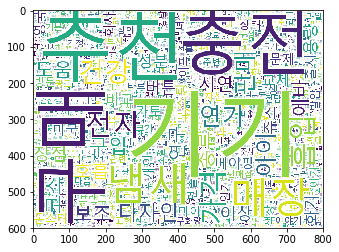

In [25]:
w1=WordCloud(font_path = 'C:\\windows\\Fonts\\malgun.ttf', width=800,height=600,mode='RGBA',background_color='white',max_words=2000).fit_words(dict(sort_result))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

w1 = w1.to_file(openFileName+'.png')